In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold


In [47]:
df=pd.read_csv("/content/DefaultPrediction.csv")

In [48]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LTI,EMI,Disposable_Income,Credit_Line_Utilization
0,65,129748,222973,536,54,1,5.46,60,0.38,PhD,...,Single,No,No,Auto,No,0,1.718508,3716.216667,126031.783333,222973.000000
1,66,105494,142070,618,97,3,9.19,48,0.52,Bachelor's,...,Single,No,No,Business,No,0,1.346712,2959.791667,102534.208333,47356.666667
2,49,87507,104287,783,51,4,23.28,48,0.50,PhD,...,Married,Yes,Yes,Auto,Yes,0,1.191756,2172.645833,85334.354167,26071.750000
3,24,86964,30938,507,61,1,24.71,12,0.16,High School,...,Married,No,No,Home,Yes,1,0.355756,2578.166667,84385.833333,30938.000000
4,45,120774,16348,623,29,2,16.85,60,0.33,High School,...,Single,No,Yes,Business,Yes,0,0.135360,272.466667,120501.533333,8174.000000


In [49]:
df.shape

(11999, 21)

In [50]:
X=df.drop("Default",axis=1)
y=df['Default']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.78,random_state=42,stratify=y)

In [81]:
X_train.shape

(9359, 20)

In [82]:
X.dtypes

,0
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64
Education,object


In [83]:
categorical_cols=X_train.select_dtypes(include=['object']).columns

In [84]:
ohe=OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)
X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]),columns=ohe.get_feature_names_out(categorical_cols),index=X_train.index)
X_test_ohe=pd.DataFrame(ohe.transform(X_test[categorical_cols]),columns=ohe.get_feature_names_out(categorical_cols),index=X_test.index)

In [85]:
X_train=X_train.drop(categorical_cols,axis=1)
X_test=X_test.drop(categorical_cols,axis=1)

In [86]:
X_train=pd.concat([X_train,X_train_ohe],axis=1)
X_test=pd.concat([X_test,X_test_ohe],axis=1)

In [87]:
X_train.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,LTI,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
7026,36,22062,152710,352,55,1,21.54,48,0.14,6.921857,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
8376,50,97085,42023,492,96,3,16.01,48,0.59,0.432848,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7765,31,108764,128254,754,109,1,5.03,24,0.16,1.179195,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3399,25,25941,215606,365,13,3,22.12,36,0.73,8.311399,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6069,66,135047,72332,677,102,2,9.76,12,0.78,0.535606,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2803,35,52911,200132,315,75,2,11.75,60,0.67,3.782427,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5483,59,134260,32310,810,116,2,5.48,36,0.52,0.240652,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
295,55,137106,43374,786,88,2,13.61,12,0.68,0.316354,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7231,40,54803,130392,403,76,1,10.31,60,0.30,2.379286,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4778,58,66753,164304,414,8,3,19.22,60,0.22,2.461373,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Income'),
  Text(0, 2.5, 'LoanAmount'),
  Text(0, 3.5, 'CreditScore'),
  Text(0, 4.5, 'MonthsEmployed'),
  Text(0, 5.5, 'NumCreditLines'),
  Text(0, 6.5, 'InterestRate'),
  Text(0, 7.5, 'LoanTerm'),
  Text(0, 8.5, 'DTIRatio'),
  Text(0, 9.5, 'LTI'),
  Text(0, 10.5, 'EMI'),
  Text(0, 11.5, 'Disposable_Income'),
  Text(0, 12.5, 'Credit_Line_Utilization'),
  Text(0, 13.5, 'Education_High School'),
  Text(0, 14.5, "Education_Master's"),
  Text(0, 15.5, 'Education_PhD'),
  Text(0, 16.5, 'EmploymentType_Part-time'),
  Text(0, 17.5, 'EmploymentType_Self-employed'),
  Text(0, 18.5, 'EmploymentType_Unemployed'),
  Text(0, 19.5, 'MaritalStatus_Married'),
  Text(0, 20.5, 'MaritalStatus_Single'),
  Text(0, 21.5, 'HasMortgage_Yes'),
  Text(0, 22.5, 'HasDependents_Yes'),

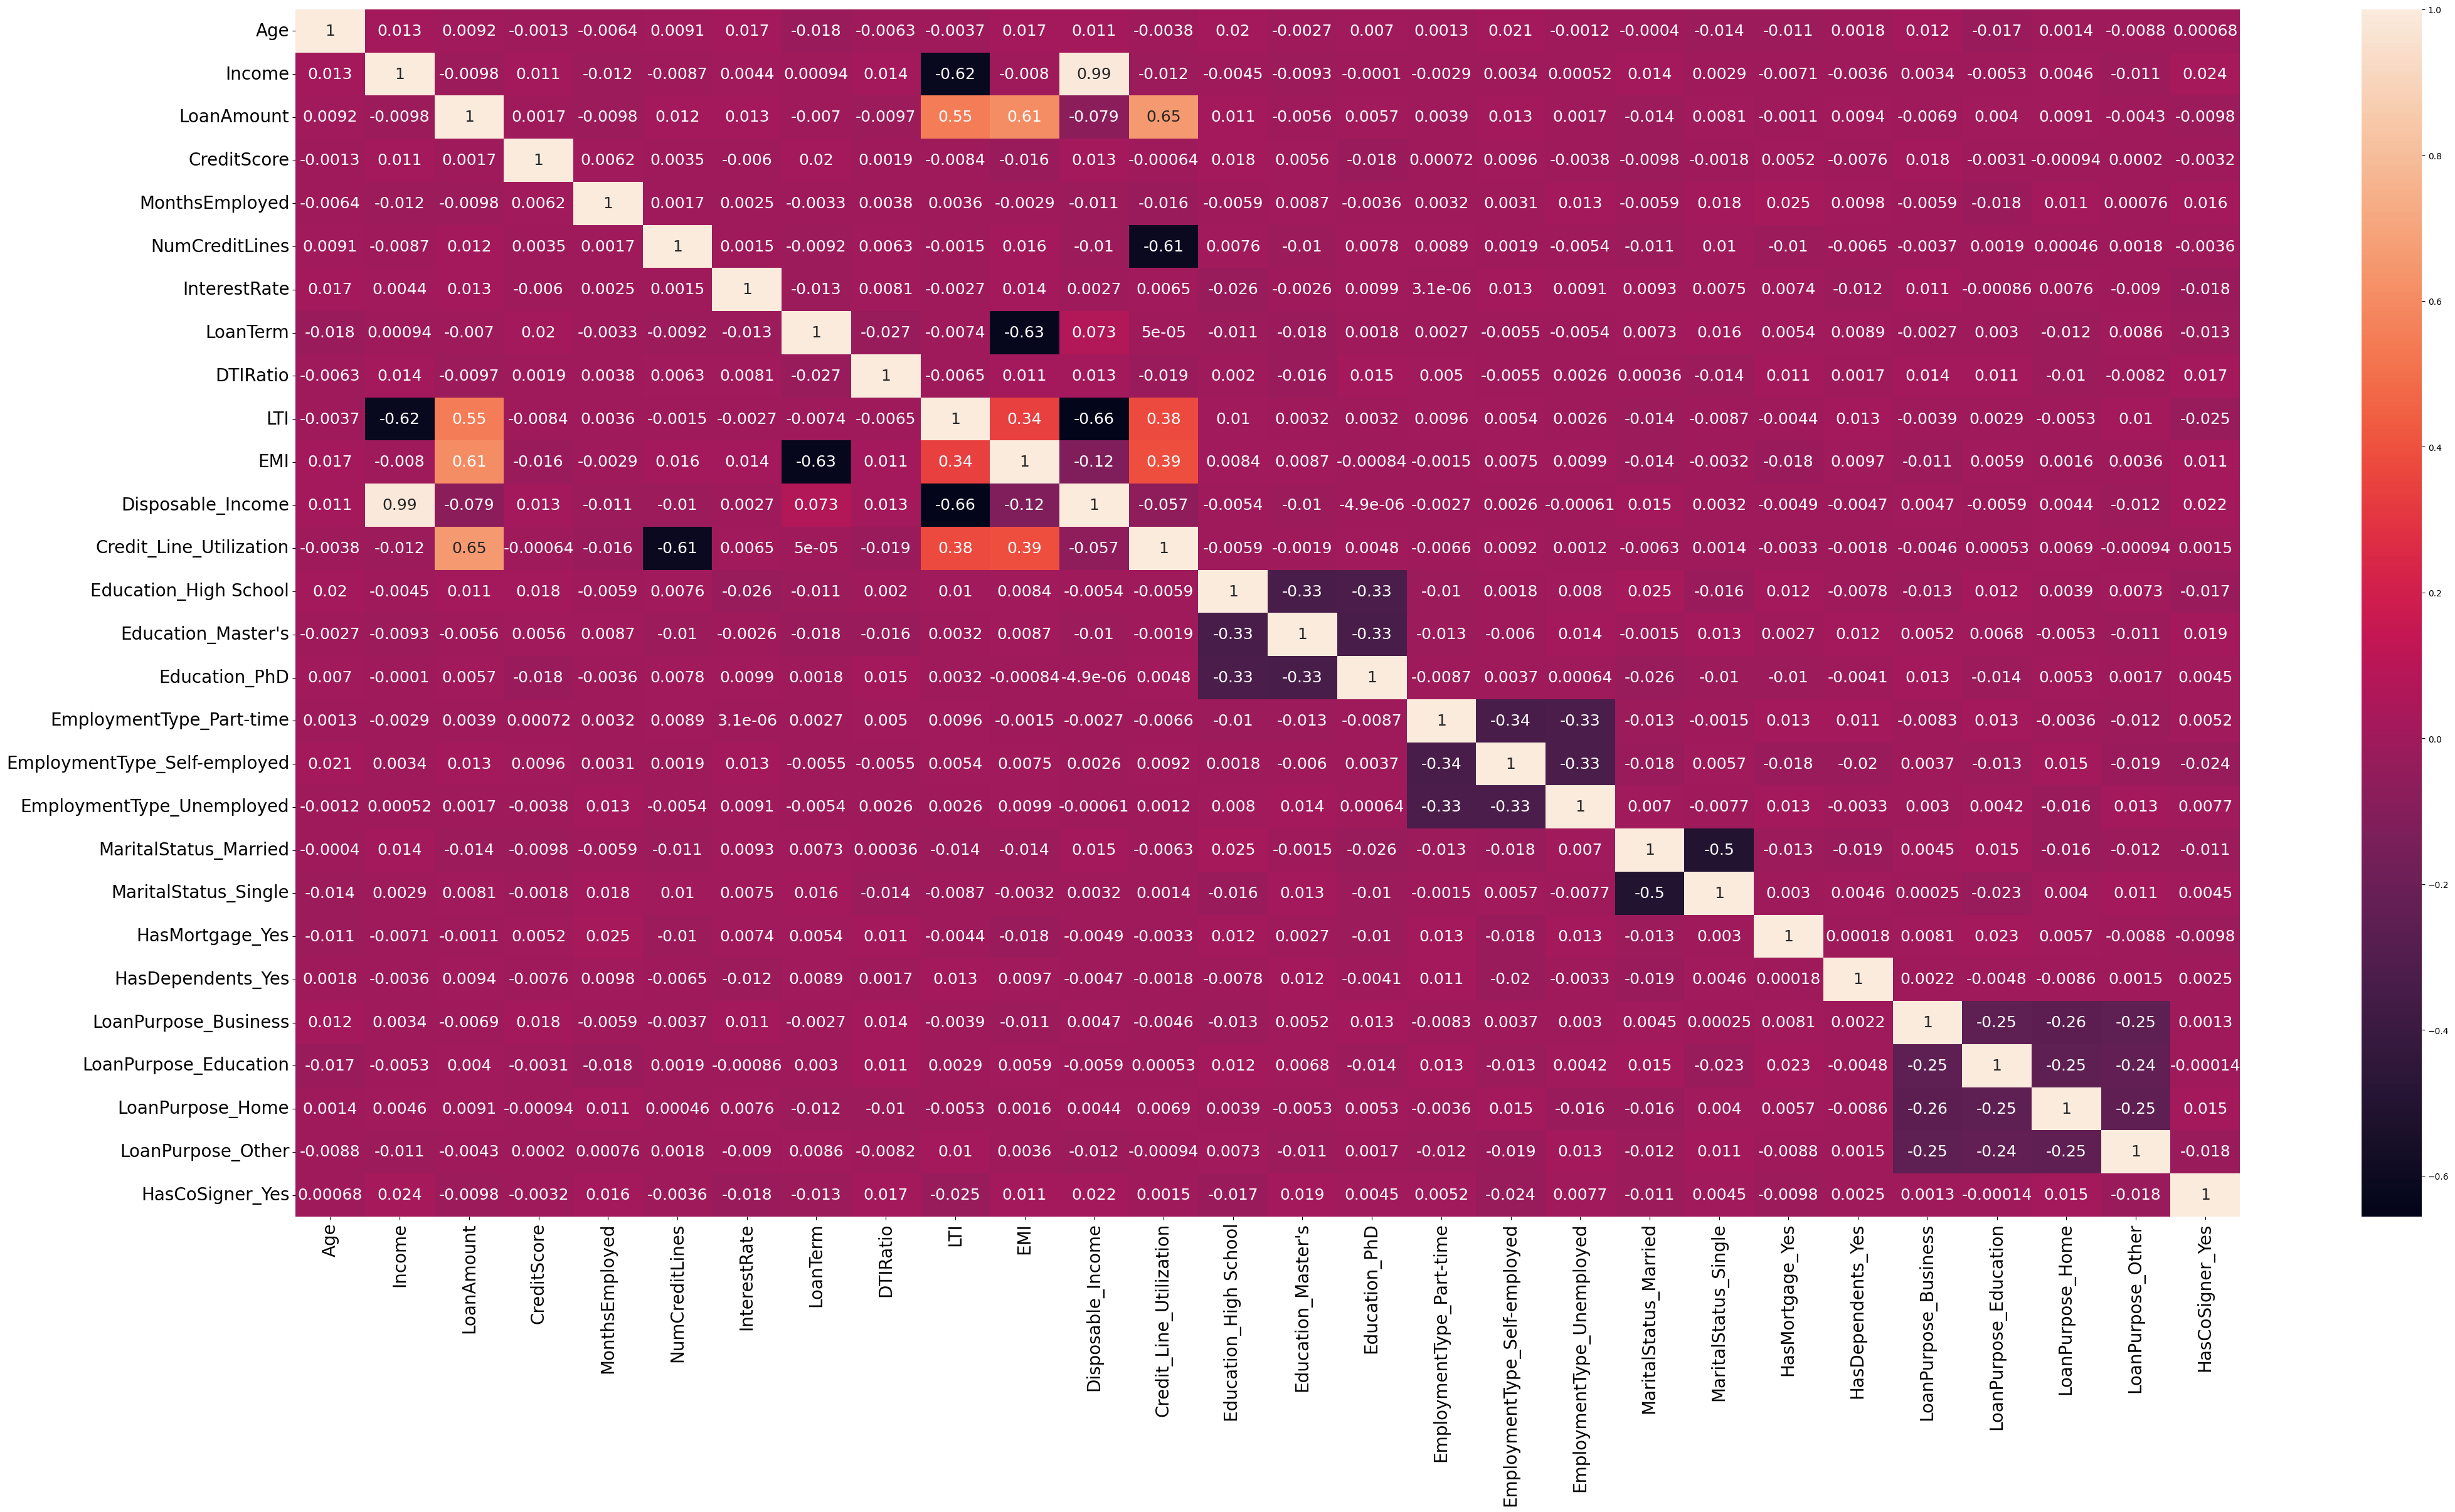

In [88]:
plt.figure(figsize=(50,25))
sns.heatmap(data=X_train.corr(),annot=True,annot_kws={"size":18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [89]:
def Correlation(df,threshold):
  col_corr=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i][j]>threshold):
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [90]:
dropping_features=list(Correlation(X_train,0.8))
dropping_features

/tmp/ipython-input-939486674.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_matrix.iloc[i][j]>threshold):


['Disposable_Income']

In [91]:
X_train=X_train.drop(dropping_features,axis=1)
X_test=X_test.drop(dropping_features,axis=1)

In [92]:
from sklearn.feature_selection import VarianceThreshold
select=VarianceThreshold(threshold=0.02)
X_left=select.fit_transform(X_train)
left_column=X_train.columns[select.get_support()]
left_column

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'LTI', 'EMI',
       'Credit_Line_Utilization', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes',
       'HasDependents_Yes', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')

In [93]:
smote=SMOTETomek(sampling_strategy=0.31,random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)
print("before:",y_train.value_counts())
print("after:",y_train_resampled.value_counts())


before: Default
0    8298
1    1061
Name: count, dtype: int64
after: Default
0    7828
1    2102
Name: count, dtype: int64


In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
neg,pos=np.bincount(y_train)
ratio=neg/pos
print(ratio)

7.820923656927427


In [95]:
xgb=XGBClassifier(objective="binary:logistic",eval_metric="auc",use_label_encoder=False,n_jobs=-1,scale_pos_weight=ratio,random_state=42)

In [96]:
parameters={"n_estimators":[950,1000],
            "learning_rate":[0.01,0.02,0.05],
            "max_depth":[2,3],
            "min_child_weight":[20,22,26],
            "gamma":[0,0.2],
            "subsample":[0.8,0.9],
            "colsample_bytree":[0.9,1],
            "reg_alpha":[0,0.5,0.8,1],
            "reg_lambda":[16,18,20] }

In [97]:
from sklearn.model_selection import StratifiedKFold

In [98]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [99]:
grid=RandomizedSearchCV(xgb,parameters,scoring="roc_auc",n_iter=20,cv=3,n_jobs=-1,random_state=42)

In [100]:
grid.fit(X_train_resampled,y_train_resampled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:39:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrai...
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.9, 1],
                                        'gamma': [0, 0.2],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [2, 3],
                                        'min_child_weight': [20, 22, 26],
                                        'n_estimators': [950, 1000],
                                        'reg_alpha': [0, 0.5, 0.8, 1],
                                        'reg_lambda': [16, 18, 20],
                                        'subsample': [0.8, 0.9]},
                   random_state=42, scoring='roc_auc')

In [188]:
best_model=grid.best_estimator_

In [101]:
print(grid.best_params_)
print(grid.best_score_)

{'subsample': 0.8, 'reg_lambda': 18, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 26, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.9}
0.9059416604652079


In [178]:
from sklearn.metrics import roc_auc_score, roc_curve

In [185]:
print("Val ROC-AUC:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Val ROC-AUC: 0.7466294454389472


In [180]:
y_pred_proba = grid.predict_proba(X_test)[:, 1]
threshold = 0.395

y_pred = (y_pred_proba >= threshold).astype(int)

In [181]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score ,recall_score

In [182]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[1372  969]
 [  70  229]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.73      2341
           1       0.19      0.77      0.31       299

    accuracy                           0.61      2640
   macro avg       0.57      0.68      0.52      2640
weighted avg       0.87      0.61      0.68      2640

0.7658862876254181


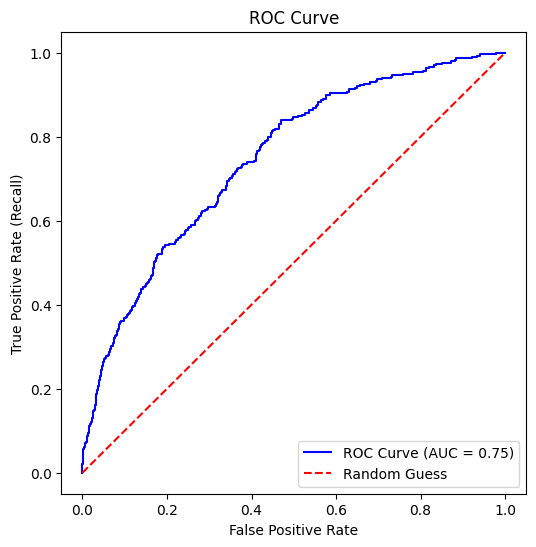

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [191]:
import shap
summarize=shap.Explainer(best_model,X_train_resampled)
shap_values=summarize(X_test)

 99%|===================| 2610/2640 [00:44<00:00]       

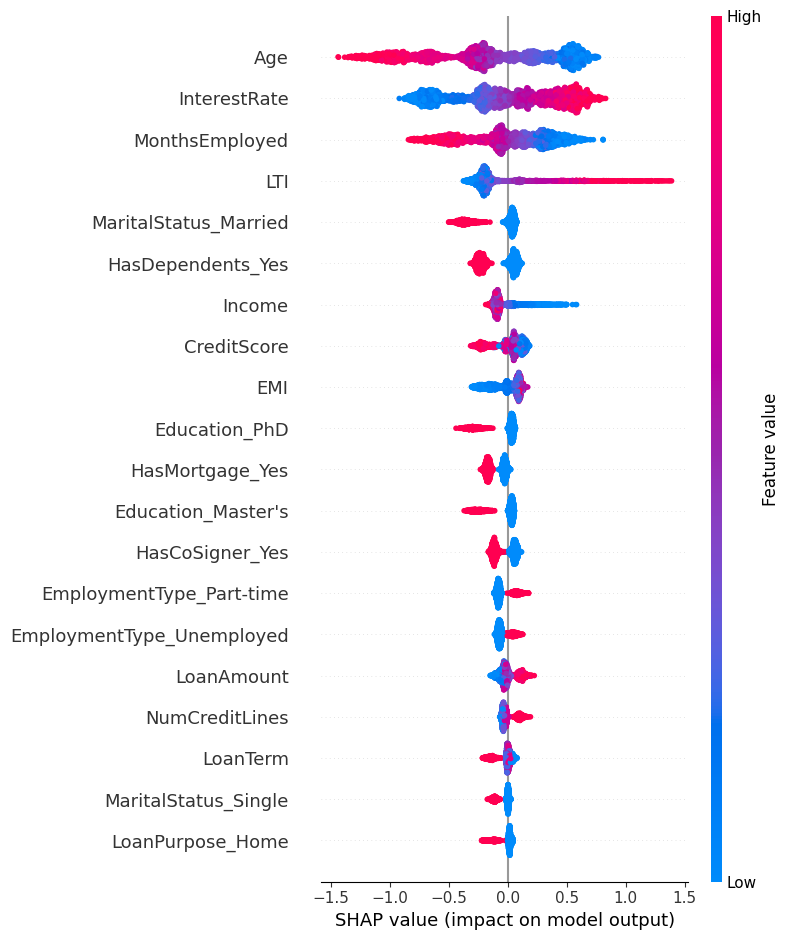

In [192]:
shap.summary_plot(shap_values, X_test)

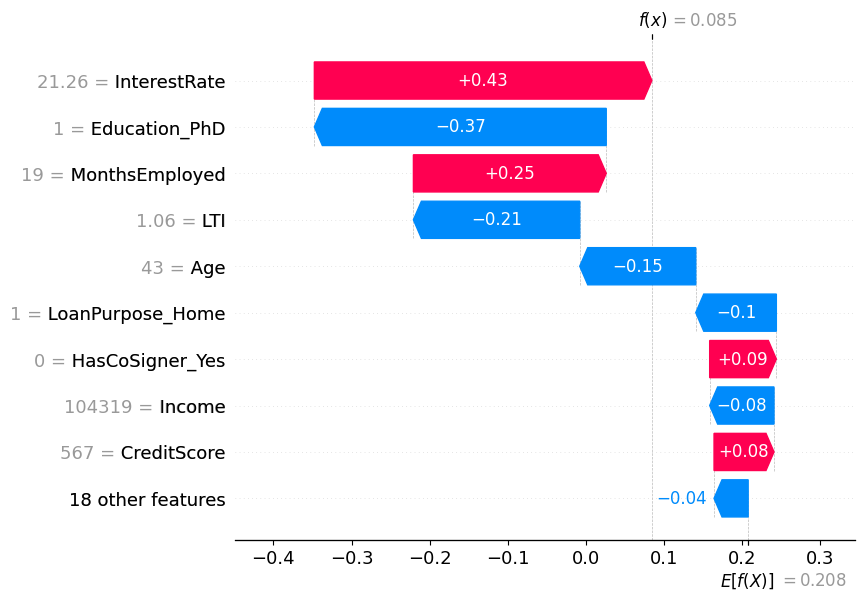

In [190]:
shap.plots.waterfall(shap_values[0])

To make the predictions interpretable, SHAP (SHapley Additive exPlanations) values were calculated. SHAP helps us understand both global feature importance (what matters most overall) and local explanations (why a specific borrower was predicted to default or not).

1. Global Feature Importance (SHAP Beeswarm Plot)

The summary plot shows how each feature influences loan default predictions.

High Interest Rates → Strongly increase default risk.

Higher Credit Scores → Strongly reduce default risk.

Loan-to-Income (LTI) → Higher values increase risk.

Employment Duration → Longer employment reduces risk.

Age → Older applicants generally less risky.

Dependents → Having dependents increases risk slightly.

This means the model is aligned with financial intuition: higher debt burden and interest rates are risky, while stable income and good credit are protective.

2. Local Explanation (SHAP Waterfall Plot)

SHAP can also explain individual predictions.

Example: For one borrower, the model predicted a high probability of default because:

📈 High Interest Rate (+0.43) → increased default risk.

📉 PhD Education Level (–0.37) → reduced default risk.

📈 Short Employment History (+0.25) → increased risk.

📉 Moderate LTI (–0.21) → slightly reduced risk.

This shows exactly why the model flagged this borrower as high-risk, making the results transparent.

## Purpose

The main purpose of building this project was to highlight that model building is not just about calling fit() and predict(). That’s only the surface of machine learning. To actually build a strong and reliable model, you need to carefully consider multiple steps such as data quality assessment, feature engineering, feature selection, model selection, and hyperparameter tuning. I will try to explain each of these aspects in detail so that the end-to-end thought process becomes clear.

### Quality of Data

The first and most important step before building any model is to assess the quality of data. While performing exploratory data analysis (EDA), I noticed that the dataset I chose was not able to clearly distinguish between predictors and non-predictors. Sometimes the dataset can be dummy data, or the data collected may contain such mixed signals that it cannot be used effectively to build a model.

In my case, even after trying different approaches, the model only achieved around 74–75% accuracy on the test set, while the training accuracy reached 92–93%. At first glance this looks like overfitting, and in a sense it is, but the deeper issue was that for most features, the peaks for both “Yes” and “No” classes were at nearly the same place. This indicates that the dataset itself does not provide strong separability between classes.

This example emphasizes a key principle: if the data is not rich or consistent enough to capture meaningful patterns, you cannot achieve good test accuracy — no matter how much hyperparameter tuning you do, which algorithm you choose, or how advanced your feature engineering and feature selection are. The foundation of every good model is high-quality data and its inherent capacity to reveal patterns. Without that, model performance will always be limited.